# Task
Load the `pune_rent_dataset.csv` file, perform exploratory data analysis including outlier visualization and removal, analyze categorical features, build and train a Linear Regression model, evaluate its performance, and summarize the key findings.

## Load Data and Initial Overview

### Subtask:
Load the 'pune_rent_dataset.csv' file into a pandas DataFrame. Display the first few rows, general information about the DataFrame, and check for any missing values.


**Reasoning**:
I will load the dataset, display its head, information, and missing values to get an initial overview as requested by the subtask.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/pune_rent_dataset.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())
print("\n" + "-" * 30 + "\n")

# Print a concise summary of the DataFrame
print("DataFrame Info:")
df.info()
print("\n" + "-" * 30 + "\n")

# Check for and display the count of missing values for each column
print("Missing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
  Locality    BHK  Area_sqft       Furnishing  Floor_Number  \
0   Akurdi  1 BHK      318.0   Semi-Furnished          13.0   
1   Akurdi  2 BHK      757.0   Semi-Furnished           1.0   
2   Akurdi  1 BHK      510.0  Fully Furnished          14.0   
3   Akurdi  1 BHK      414.0   Semi-Furnished           1.0   
4   Akurdi  2 BHK      954.0   Semi-Furnished           7.0   

   Total_Building_Floors  Age_Years  Balconies  Bathrooms  Parking Lift  \
0                   15.0       15.0        0.0        1.0      1.0  Yes   
1                    3.0       20.0        1.0        2.0      1.0   No   
2                   15.0       10.0        0.0        1.0      1.0  Yes   
3                    3.0        3.0        0.0        1.0      1.0   No   
4                   12.0        7.0        1.0        1.0      2.0  Yes   

    Availability Tenant_Type  Security_Deposit  Rent_INR  
0      Immediate    Bachelor           25875.0    8625.0  
1      Immediate     

## Visualize Rent Outliers

### Subtask:
Generate a boxplot for the 'Rent_INR' column to visualize the distribution and identify potential outliers.


**Reasoning**:
I will import the necessary libraries, create a boxplot for the 'Rent_INR' column, add a title and y-axis label, and then display the plot to visualize its distribution and potential outliers as requested.



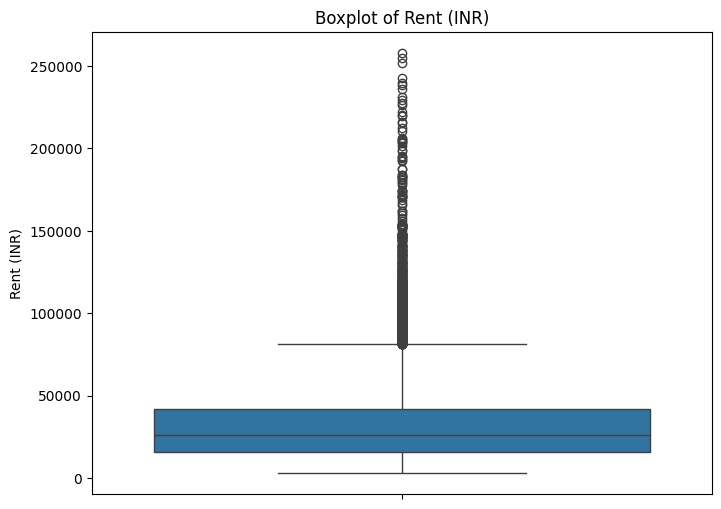

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'Rent_INR' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Rent_INR'])
plt.title('Boxplot of Rent (INR)')
plt.ylabel('Rent (INR)')
plt.show()

## Remove Outliers from Rent

### Subtask:
Identify and remove outliers from the 'Rent_INR' column using the Interquartile Range (IQR) method to ensure the model is not unduly influenced by extreme values.


**Reasoning**:
I will calculate the first and third quartiles (Q1 and Q3) of the 'Rent_INR' column, then compute the Interquartile Range (IQR) and use it to determine the lower and upper bounds for outlier detection. Finally, I will filter the DataFrame to remove the outliers and print the shape before and after the removal to show the effect of the operation.



In [ ]:
# Store the original shape for comparison
original_shape = df.shape
print(f"Original DataFrame shape: {original_shape}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Rent_INR'
Q1 = df['Rent_INR'].quantile(0.25)
Q3 = df['Rent_INR'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Rent_INR'] >= lower_bound) & (df['Rent_INR'] <= upper_bound)]

# Print the shape of the DataFrame after outlier removal
print(f"DataFrame shape after outlier removal: {df.shape}")


Original DataFrame shape: (20102, 15)
DataFrame shape after outlier removal: (19251, 15)


## Analyze Categorical Features

### Subtask:
Display the value counts for the categorical columns: 'Locality', 'Furnishing', 'Availability', and 'Tenant_Type' to understand their distribution.


**Reasoning**:
I will display the value counts for the specified categorical columns using a loop and `value_counts()` to understand their distribution as requested by the subtask.



In [ ]:
categorical_cols = ['Locality', 'Furnishing', 'Availability', 'Tenant_Type']

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())
    print("\n" + "-" * 30 + "\n")


Value counts for column: Locality
Locality
Akurdi                    100
Alandi                    100
Ambegaon BK               100
Ambegaon KH               100
Ambernath Nagar           100
                         ... 
Boat Club Road             64
Baner                      64
Magarpatta City            64
Baner Gaon                 60
Baner-Pashan Link Road     60
Name: count, Length: 201, dtype: int64

------------------------------


Value counts for column: Furnishing
Furnishing
Semi-Furnished     9616
Unfurnished        5955
Fully Furnished    3680
Name: count, dtype: int64

------------------------------


Value counts for column: Availability
Availability
Immediate         11490
Not Sure           3864
After 1 Month      2918
After 2 Months      979
Name: count, dtype: int64

------------------------------


Value counts for column: Tenant_Type
Tenant_Type
Family      11571
Bachelor     4918
Both         2762
Name: count, dtype: int64

------------------------------



## Prepare Data for Modeling

### Subtask:
Separate the features (X) from the target variable (y), 'Rent_INR'. Split the data into training and testing sets (80% train, 20% test) to prepare for model building.


**Reasoning**:
I will separate features (X) from the target variable (y) and then split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state of 42. Finally, I will print the shapes of the resulting datasets to verify the split.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (y)
X = df.drop('Rent_INR', axis=1)
y = df['Rent_INR']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (15400, 14)
Shape of X_test: (3851, 14)
Shape of y_train: (15400,)
Shape of y_test: (3851,)


## Define Preprocessing Steps

### Subtask:
Define the preprocessing steps for numerical features (StandardScaler) and categorical features (OneHotEncoder) using a ColumnTransformer. This will be integrated into the modeling pipeline.


**Reasoning**:
I will define the numerical and categorical columns from the `X_train` DataFrame, import `StandardScaler` and `OneHotEncoder`, and then create a `ColumnTransformer` to apply these preprocessing steps to their respective columns as specified in the subtask.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep any columns not specified (if any)
)

print("ColumnTransformer 'preprocessor' defined successfully.")

Numerical columns: ['Area_sqft', 'Floor_Number', 'Total_Building_Floors', 'Age_Years', 'Balconies', 'Bathrooms', 'Parking', 'Security_Deposit']
Categorical columns: ['Locality', 'BHK', 'Furnishing', 'Lift', 'Availability', 'Tenant_Type']
ColumnTransformer 'preprocessor' defined successfully.


## Build and Train Linear Regression Model

### Subtask:
Construct a scikit-learn Pipeline that first applies the defined preprocessing steps and then trains a Linear Regression model on the processed training data.


**Reasoning**:
I will import the necessary `Pipeline` and `LinearRegression` classes, then construct a pipeline with the `preprocessor` and `LinearRegression` model, and finally fit this pipeline to the training data as specified in the instructions.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create a pipeline that first preprocesses the data and then trains a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model pipeline trained successfully.")

Linear Regression model pipeline trained successfully.


## Evaluate Model Performance

### Subtask:
Make predictions on the test set using the trained model and evaluate its performance. Report metrics such as R-squared and Mean Squared Error.


**Reasoning**:
I will make predictions on the test set using the trained model, then import the necessary metrics from scikit-learn, calculate R-squared and Mean Squared Error, and finally print these evaluation metrics as requested by the subtask.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.8678
Mean Squared Error (MSE): 35894200.08


## Final Task

### Subtask:
Summarize the key findings from the data analysis, the impact of outlier removal, and the performance of the trained linear regression model.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The dataset initially contained 20,102 entries and 15 columns. Several columns had missing values: 'Locality' (1 missing), and all other 13 columns (e.g., 'BHK', 'Area\_sqft', 'Rent\_INR') each had 2 missing values.
*   **Outlier Removal**: Outliers in the 'Rent\_INR' column were identified and removed using the Interquartile Range (IQR) method. This process resulted in the removal of 851 rows, reducing the dataset from 20,102 to 19,251 rows.
*   **Categorical Feature Distribution**:
    *   'Locality': Features 201 unique localities, with 'Akurdi', 'Alandi', 'Ambegaon BK', 'Ambegaon KH', and 'Ambernath Nagar' being the most frequent (100 occurrences each).
    *   'Furnishing': Primarily `Semi-Furnished` (9,616 entries) and `Unfurnished` (5,955 entries), with `Fully Furnished` being the least common (3,680 entries).
    *   'Availability': Most properties are `Immediate` (11,490 entries), followed by `Not Sure` (3,864 entries), `After 1 Month` (2,918 entries), and `After 2 Months` (979 entries).
    *   'Tenant\_Type': `Family` is the most common tenant type (11,571 entries), followed by `Bachelor` (4,918 entries) and `Both` (2,762 entries).
*   **Linear Regression Model Performance**: After preprocessing with `StandardScaler` for numerical features and `OneHotEncoder` for categorical features, the trained Linear Regression model achieved an R-squared score of **0.8678** on the test set. The Mean Squared Error (MSE) was **35,894,200.08**.

### Insights or Next Steps

*   The Linear Regression model, after outlier removal, demonstrates strong predictive power (R-squared of approximately 86.8%), suggesting that the features effectively explain a large portion of the variance in rent prices.
*   Consider exploring more advanced regression models (e.g., Ridge, Lasso, Random Forest, Gradient Boosting) to potentially improve performance further and reduce the Mean Squared Error. Further feature engineering, especially for 'Locality' (e.g., grouping by region or proximity to key amenities), could also enhance model accuracy.
